In [1]:
import numpy as np
import pandas as pd
import wget
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# wget.download('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

In [4]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [5]:
df.shape

(20640, 10)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

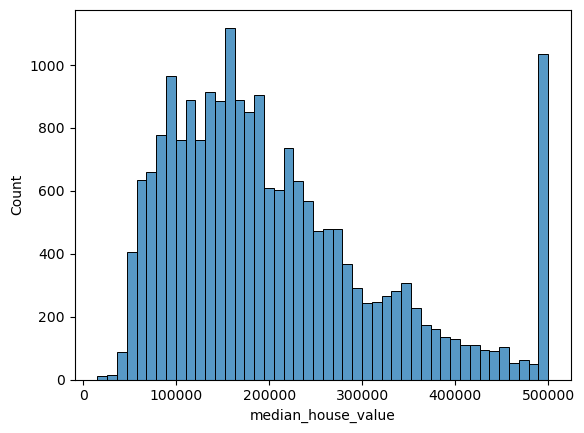

In [6]:
sns.histplot(df.median_house_value)

#### Preparing the dataset
For this homework, we only want to use a subset of data.

First, keep only the records where ocean_proximity is either `<1H OCEAN` or 'INLAND'

Next, use only the following columns:

* `latitude`,
* `longitude`,
* `housing_median_age`,
* `total_rooms`,
* `total_bedrooms`,
* `population`,
* `households`,
* `median_income`,
* `median_house_value`

In [7]:
df = pd.concat([df[df['ocean_proximity'] == '<1H OCEAN'], 
                df[df['ocean_proximity'] == 'INLAND']]) 

In [8]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN


In [9]:
df.tail(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [10]:
df.shape

(15687, 10)

In [11]:
df = df.reset_index(drop=True)

In [12]:
columns = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
            'total_bedrooms', 'population', 'households', 'median_income',
            'median_house_value']

In [13]:
df = df[columns]

In [14]:
df.shape

(15687, 9)

In [15]:
df.head(3)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
1,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
2,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0


#### Question 1
There's one feature with missing values. What is it?

* total_rooms
* total_bedrooms
* population
* households

#### Answer: total_bedrooms 

In [16]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

#### Question 2
What's the median (50% percentile) for variable `population`?

* 995
* 1095
* 1195
* 1295

#### Answer: 1195

In [17]:
df.population.describe()

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

#### Prepare and split the dataset
* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.

In [18]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [19]:
n, n_val + n_test + n_train

(15687, 15687)

In [20]:
n_train, n_val, n_test

(9413, 3137, 3137)

In [21]:
idx = np.arange(n)

In [22]:
np.random.seed(42)
np.random.shuffle(idx)

In [23]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [24]:
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [25]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [26]:
df_train.tail(3)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
9410,36.67,-121.63,34.0,2486.0,560.0,2443.0,557.0,2.5263,130400.0
9411,34.07,-118.44,26.0,3535.0,748.0,1322.0,666.0,7.1674,500001.0
9412,33.92,-118.15,30.0,915.0,234.0,646.0,211.0,2.5208,182800.0


In [27]:
df_val.tail(3)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
3134,33.86,-117.93,35.0,931.0,181.0,516.0,174.0,5.5867,182500.0
3135,36.58,-121.86,20.0,6332.0,991.0,2668.0,955.0,5.7578,347700.0
3136,33.98,-118.36,39.0,813.0,185.0,344.0,154.0,3.5833,218800.0


In [28]:
df_val.tail(3)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
3134,33.86,-117.93,35.0,931.0,181.0,516.0,174.0,5.5867,182500.0
3135,36.58,-121.86,20.0,6332.0,991.0,2668.0,955.0,5.7578,347700.0
3136,33.98,-118.36,39.0,813.0,185.0,344.0,154.0,3.5833,218800.0


In [29]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [30]:
del df_train['median_house_value']

In [31]:
df_train.head(3)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,40.18,-122.22,13.0,3719.0,803.0,1754.0,764.0,2.3517
1,33.94,-118.29,38.0,2407.0,630.0,1774.0,562.0,1.5615
2,39.52,-121.36,15.0,2490.0,527.0,1229.0,497.0,2.3917


In [32]:
del df_val['median_house_value']

In [33]:
df_val.head(3)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,33.13,-117.05,22.0,2427.0,390.0,1099.0,362.0,5.2323
1,34.19,-118.87,23.0,2179.0,423.0,1338.0,406.0,5.5224
2,33.65,-117.82,18.0,2105.0,302.0,830.0,286.0,6.3822


In [34]:
del df_test['median_house_value']

In [35]:
df_test.head(3)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,36.77,-119.77,38.0,3065.0,658.0,1441.0,625.0,2.0564
1,34.24,-118.55,21.0,5751.0,1082.0,2230.0,1016.0,4.3458
2,34.55,-117.32,18.0,279.0,59.0,188.0,60.0,0.8246


In [36]:
len(y_test)

3137

#### Question 3
* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

#### Options:
* With 0
* With mean
* Both are equally good

#### Answer: Both are equally good

In [37]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [38]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [39]:
X_train = df_train.fillna(0).values
w0, w = train_linear_regression(X_train, y_train)

X_val = df_val.fillna(0).values
y_pred = w0 + X_val.dot(w)

round(rmse(y_val, y_pred), 2)

0.34

In [40]:
X_train = df_train.fillna(df_train['total_bedrooms'].mean()).values
w0, w = train_linear_regression(X_train, y_train)

X_val = df_val.fillna(df_val['total_bedrooms'].mean()).values
y_pred = w0 + X_val.dot(w)

round(rmse(y_val, y_pred), 2)

0.34

#### Question 4
* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?
* If there are multiple options, select the smallest r.

#### Options:
* 0
* 0.000001
* 0.001
* 0.0001

#### Answer: 0

In [41]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [43]:
for r in  [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = df_train.fillna(0).values
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = df_val.fillna(0).values
    y_pred = w0 + X_val.dot(w)

    score = round(rmse(y_val, y_pred), 2)
    
    print(r, w0, score)

0 -10.644912054222113 0.34
1e-06 -10.64489008532934 0.34
0.0001 -10.642715642997304 0.34
0.001 -10.6229886459134 0.34
0.01 -10.429666588428098 0.34
0.1 -8.823782793030585 0.34
1 -3.4731097724870654 0.34
5 -0.93800470390461 0.34
10 -0.48927535386878895 0.34


#### Question 5
* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits `(round(std, 3))`

#### What's the value of std?
* 0.5
* 0.05
* 0.005
* 0.0005

#### Answer: 0.005

In [44]:
sd = []

In [47]:
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    n = len(df)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.seed(i)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    X_train = df_train.fillna(0).values
    w0, w = train_linear_regression(X_train, y_train)

    X_val = df_val.fillna(0).values
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    sd.append(score)
    
    print(i, score)

0 0.33425125461758315
1 0.33173445976100724
2 0.3470528532631567
3 0.3392529016894891
4 0.3500638611536363
5 0.3365993274587381
6 0.33602672164239616
7 0.33806618794950793
8 0.33697108099370504
9 0.33387140620892847


In [48]:
round(np.std(sd), 3)

0.006

#### Question 6
* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

#### Options:
* 0.13
* 0.23
* 0.33
* 0.43

#### Answer: 0.33

In [49]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [50]:
df_full_train = pd.concat([df_train, df_val])
df_full_train.head(3)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,40.29,-121.14,17.0,1944.0,394.0,384.0,172.0,1.6875
1,33.72,-117.60,36.0,1317.0,228.0,531.0,214.0,5.6346
2,34.14,-117.28,40.0,2364.0,438.0,968.0,416.0,3.4906


In [51]:
df_full_train = df_full_train.reset_index(drop=True)

In [52]:
X_full_train = df_full_train.fillna(0).values

In [53]:
y_full_train = np.concatenate([y_train, y_val])

In [54]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [55]:
X_test = df_test.fillna(0).values
y_pred = w0 + X_test.dot(w)

score = round(rmse(y_test, y_pred), 2)
print(score)

0.33
